In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score,recall_score ,precision_score,roc_curve,confusion_matrix
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix



In [2]:
df=pd.read_csv('/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
df[' Excess kurtosis of the integrated profile']=df[' Excess kurtosis of the integrated profile'].fillna(0)
df[' Standard deviation of the DM-SNR curve']=df[' Standard deviation of the DM-SNR curve'].fillna(0)
df[' Skewness of the DM-SNR curve']=df[' Skewness of the DM-SNR curve'].fillna(0)


In [4]:
df.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [5]:
df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.551105,-0.796097,-0.737598,-0.298123,-0.282360,0.235781,0.142800,-0.676129
Standard deviation of the integrated profile,0.551105,1.000000,-0.480987,-0.539896,-0.001656,-0.055262,0.031671,0.029041,-0.365757
Excess kurtosis of the integrated profile,-0.796097,-0.480987,1.000000,0.864970,0.380480,0.361582,-0.314162,-0.189764,0.725503
Skewness of the integrated profile,-0.737598,-0.539896,0.864970,1.000000,0.412659,0.385638,-0.328675,-0.195511,0.707086
Mean of the DM-SNR curve,-0.298123,-0.001656,0.380480,0.412659,1.000000,0.712083,-0.616385,-0.337331,0.400375
Standard deviation of the DM-SNR curve,-0.282360,-0.055262,0.361582,0.385638,0.712083,1.000000,-0.714730,-0.481908,0.439439
Excess kurtosis of the DM-SNR curve,0.235781,0.031671,-0.314162,-0.328675,-0.616385,-0.714730,1.000000,0.877052,-0.389788
Skewness of the DM-SNR curve,0.142800,0.029041,-0.189764,-0.195511,-0.337331,-0.481908,0.877052,1.000000,-0.247414
target_class,-0.676129,-0.365757,0.725503,0.707086,0.400375,0.439439,-0.389788,-0.247414,1.000000


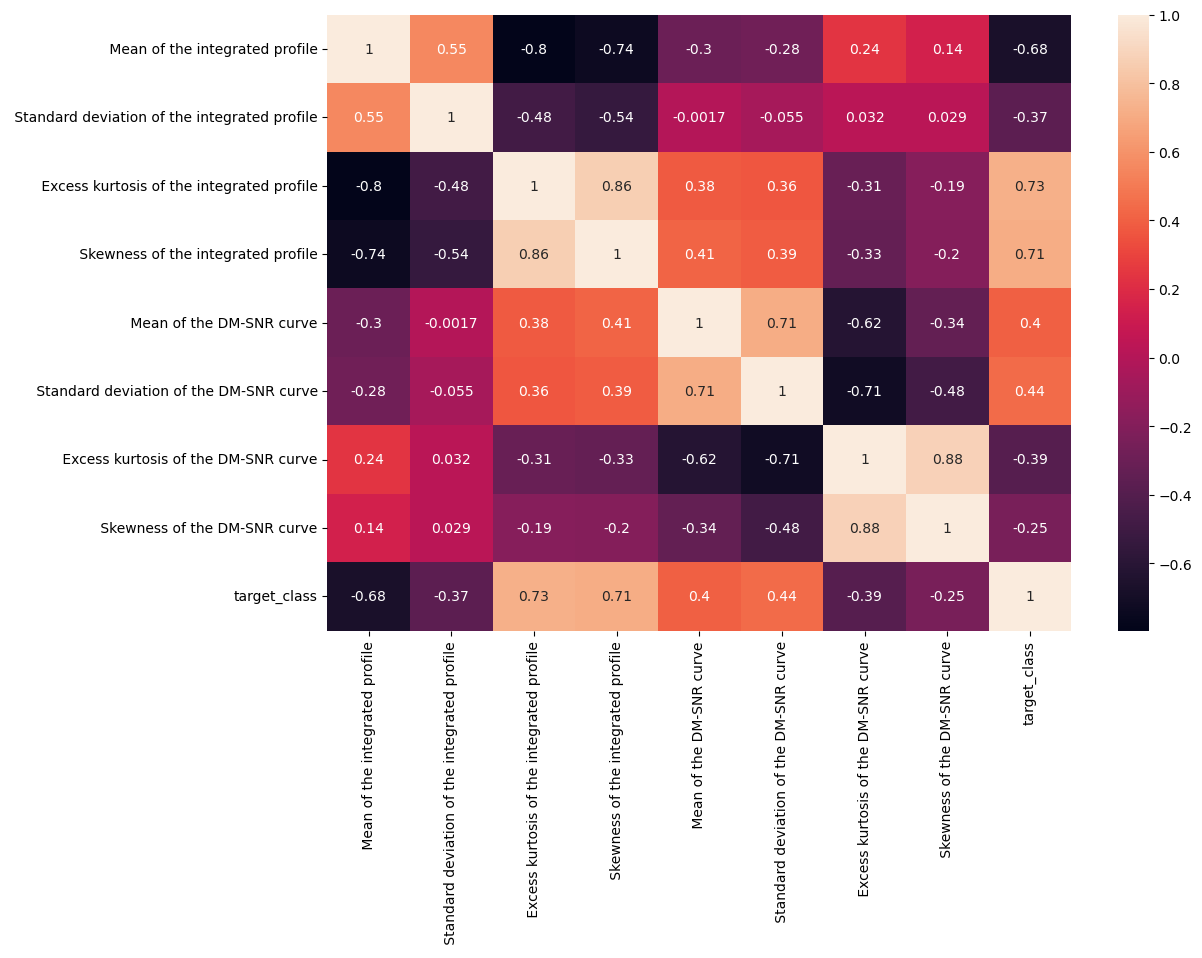

In [6]:
fg,ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(df.corr(),annot=True)

In [7]:
scaler=preprocessing.StandardScaler()

In [8]:
X=pd.DataFrame(scaler.fit_transform(df.drop(['target_class'],axis=1)))

In [9]:
Y=df['target_class'].values

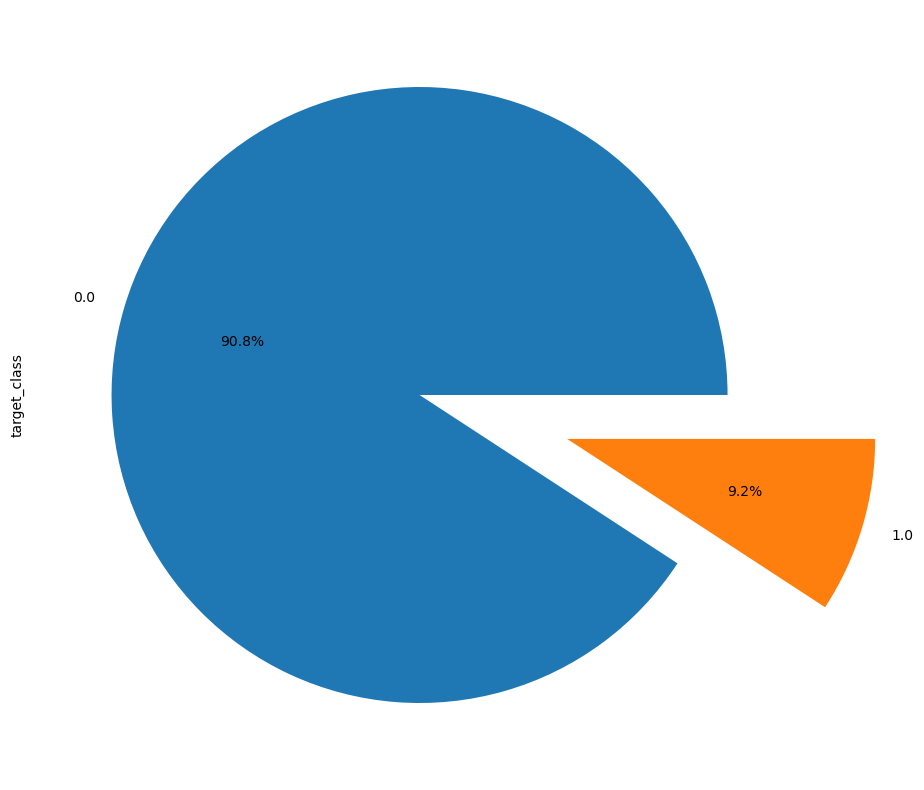

In [10]:
fg,ax=plt.subplots(figsize=(14,10))
explode=[0.0,0.5]
ax=(df['target_class'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', explode=explode)

In [11]:
sm=SMOTE(random_state=42)
X,Y=sm.fit_resample(X,Y)

In [12]:
df_test=pd.read_csv('/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv')
df_test.drop(['target_class'], axis=1, inplace=True)


In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3, random_state=42)

In [14]:
parameters = {'C':[0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
gridCV = GridSearchCV(SVC(), parameters, n_jobs=-1)             
gridCV.fit(X_train, y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']
print(best_C)
print(best_gamma)

100
1


In [15]:
SVM_best = SVC(kernel='rbf', C=100,gamma=1)
SVM_best.fit(X_train, y_train);
y_pred = SVM_best.predict(X_test)


In [16]:
print("F1-score",f1_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("percision: ",precision_score(y_test,y_pred))
print("accuracy:", metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

F1-score 0.9755450795521508
Recall:  0.9787171149866982
percision:  0.9723935389133627
accuracy: 0.9756776556776556
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      3442
         1.0       0.97      0.98      0.98      3383

    accuracy                           0.98      6825
   macro avg       0.98      0.98      0.98      6825
weighted avg       0.98      0.98      0.98      6825



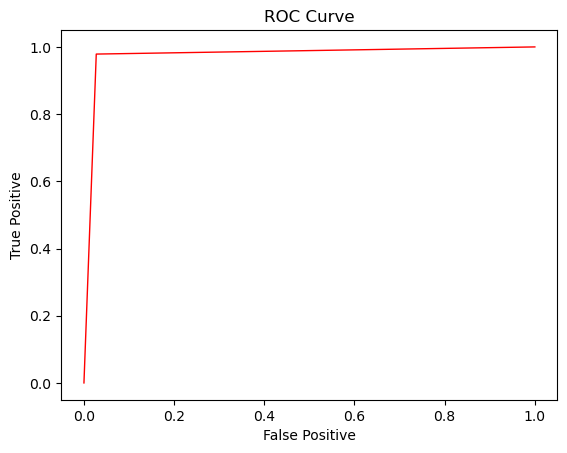

In [17]:
FPR, TPR, cutoffs = metrics.roc_curve(y_test,y_pred,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

[[3348   94]
 [  72 3311]]


(<Figure size 1200x500 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

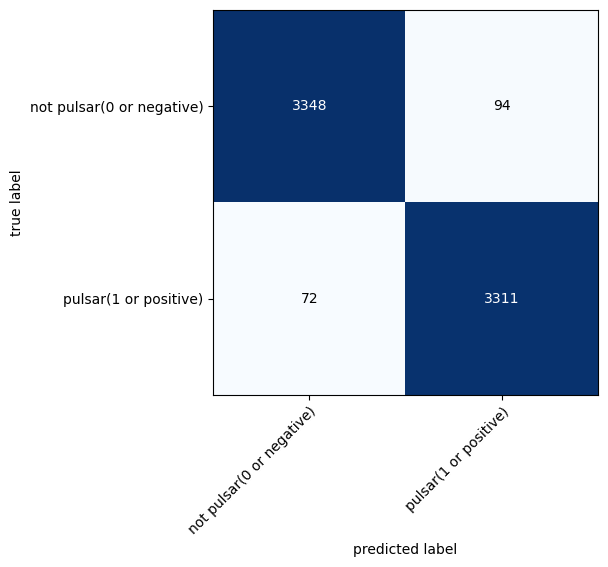

In [18]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["not pulsar(0 or negative)","pulsar(1 or positive)"],figsize=(12,5))

In [19]:
df_test[' Excess kurtosis of the integrated profile']=df_test[' Excess kurtosis of the integrated profile'].fillna(0)
df_test[' Standard deviation of the DM-SNR curve']=df_test[' Standard deviation of the DM-SNR curve'].fillna(0)
df_test[' Skewness of the DM-SNR curve']=df_test[' Skewness of the DM-SNR curve'].fillna(0)


In [20]:
df_test.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64

In [21]:
X=pd.DataFrame(scaler.fit_transform(df_test))

In [22]:
Target_test=SVM_best.predict(X)
print(Target_test)

[0. 1. 0. ... 0. 0. 0.]


In [23]:
df_test["Target_test"]=Target_test

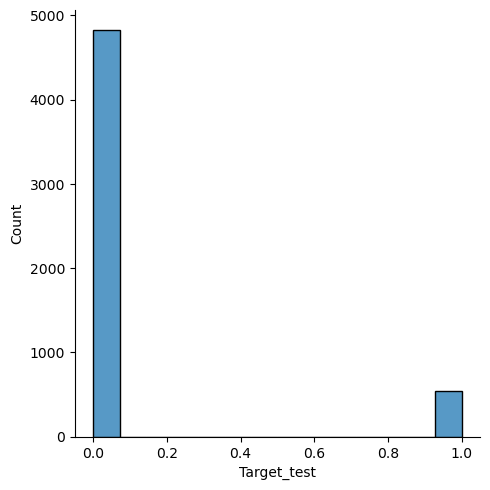

In [24]:
sns.displot(df_test['Target_test'])
